In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import linregress

sns.set_style("darkgrid")

In [2]:
data_columns = [
    "fuel", 
    "oxidizer",
    "diluent",
    "phi_nom",
    "phi",
    "u_phi",
    "dil_mf_nom",
    "dil_mf",
    "u_dil_mf",
    "wave_speed",
    "u_wave_speed", 
    "cj_speed",
    "sound_speed",
    "t_ad",
]

In [3]:
data = pd.read_csv("cj_tad_ss_results.csv")[data_columns]
data.head()

,fuel,oxidizer,diluent,phi_nom,phi,u_phi,dil_mf_nom,dil_mf,u_dil_mf,wave_speed,u_wave_speed,cj_speed,sound_speed,t_ad
0,CH4,N2O,N2,1.0,1.070145,0.000710,0.10,0.232712,0.000099,2059.459459,2.811308,2114.464151,1148.785328,2794.637781
1,CH4,N2O,N2,0.4,0.412540,0.000307,0.15,0.250255,0.000054,1795.959596,2.137938,1895.341221,1041.095726,2436.412954
2,CH4,N2O,N2,1.0,1.088798,0.000911,0.20,0.387742,0.000101,1961.029412,2.549002,2031.781270,1108.463881,2657.521685
3,CH4,N2O,CO2,0.4,0.413831,0.000259,0.10,0.102603,0.000052,1783.946488,2.109433,1875.787281,1021.580802,2516.543411
4,CH4,N2O,N2,1.0,1.095292,0.000808,0.20,0.386997,0.000086,1979.220779,2.596513,2033.211722,1109.304497,2658.704224


In [24]:
print("unfiltered", len(data))
plot_data = data[
    (data["cj_speed"].notna())
    & (data["sound_speed"].notna())
    & (data["wave_speed"].notna())
]
plot_data = plot_data[plot_data["fuel"] == "CH4"]
print("filtered", len(plot_data))

unfiltered 529
filtered 83


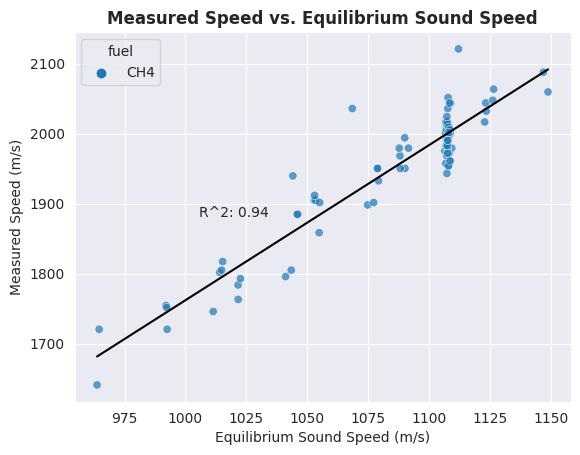

In [25]:
sns.scatterplot(
    x="sound_speed",
    y="wave_speed",
    hue ="fuel",
    style="fuel",
    data=plot_data,
    alpha=0.7,
)
lr_sound_speed = linregress(plot_data["sound_speed"], plot_data["wave_speed"])
x = np.array([plot_data["sound_speed"].min(), data["sound_speed"].max()])
plt.plot(x, lr_sound_speed.slope * x + lr_sound_speed.intercept, "k")
plt.text(0.25, 0.5, f"R^2: {lr_sound_speed.rvalue:.2f}", transform=plt.gca().transAxes)
plt.title("Measured Speed vs. Equilibrium Sound Speed", weight="bold")
plt.xlabel("Equilibrium Sound Speed (m/s)")
plt.ylabel("Measured Speed (m/s)");

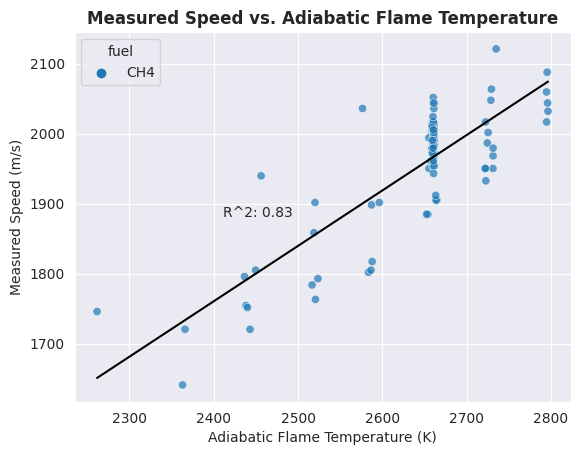

In [26]:
sns.scatterplot(
    x="t_ad",
    y="wave_speed",
    hue ="fuel",
    style="fuel",
    data=plot_data,
    alpha=0.7,
)
lr_t_ad = linregress(plot_data["t_ad"], plot_data["wave_speed"])
x = np.array([plot_data["t_ad"].min(), plot_data["t_ad"].max()])
plt.plot(x, lr_t_ad.slope * x + lr_t_ad.intercept, "k")
plt.text(0.3, 0.5, f"R^2: {lr_t_ad.rvalue:.2f}", transform=plt.gca().transAxes)
plt.title("Measured Speed vs. Adiabatic Flame Temperature", weight="bold")
plt.xlabel("Adiabatic Flame Temperature (K)")
plt.ylabel("Measured Speed (m/s)");

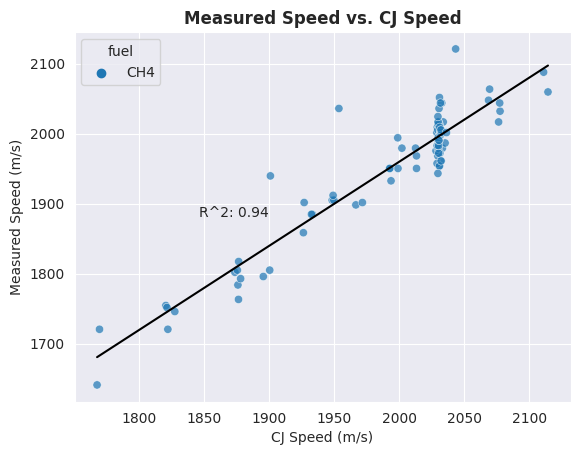

In [27]:
sns.scatterplot(
    x="cj_speed",
    y="wave_speed",
    hue ="fuel",
    style="fuel",
    data=plot_data,
    alpha=0.7,
)
lr_cj_speed = linregress(plot_data["cj_speed"], plot_data["wave_speed"])
x = np.array([plot_data["cj_speed"].min(), plot_data["cj_speed"].max()])
plt.plot(x, lr_cj_speed.slope * x + lr_cj_speed.intercept, "k")
plt.text(0.25, 0.5, f"R^2: {lr_cj_speed.rvalue:.2f}", transform=plt.gca().transAxes)
plt.title("Measured Speed vs. CJ Speed", weight="bold")
plt.xlabel("CJ Speed (m/s)")
plt.ylabel("Measured Speed (m/s)");

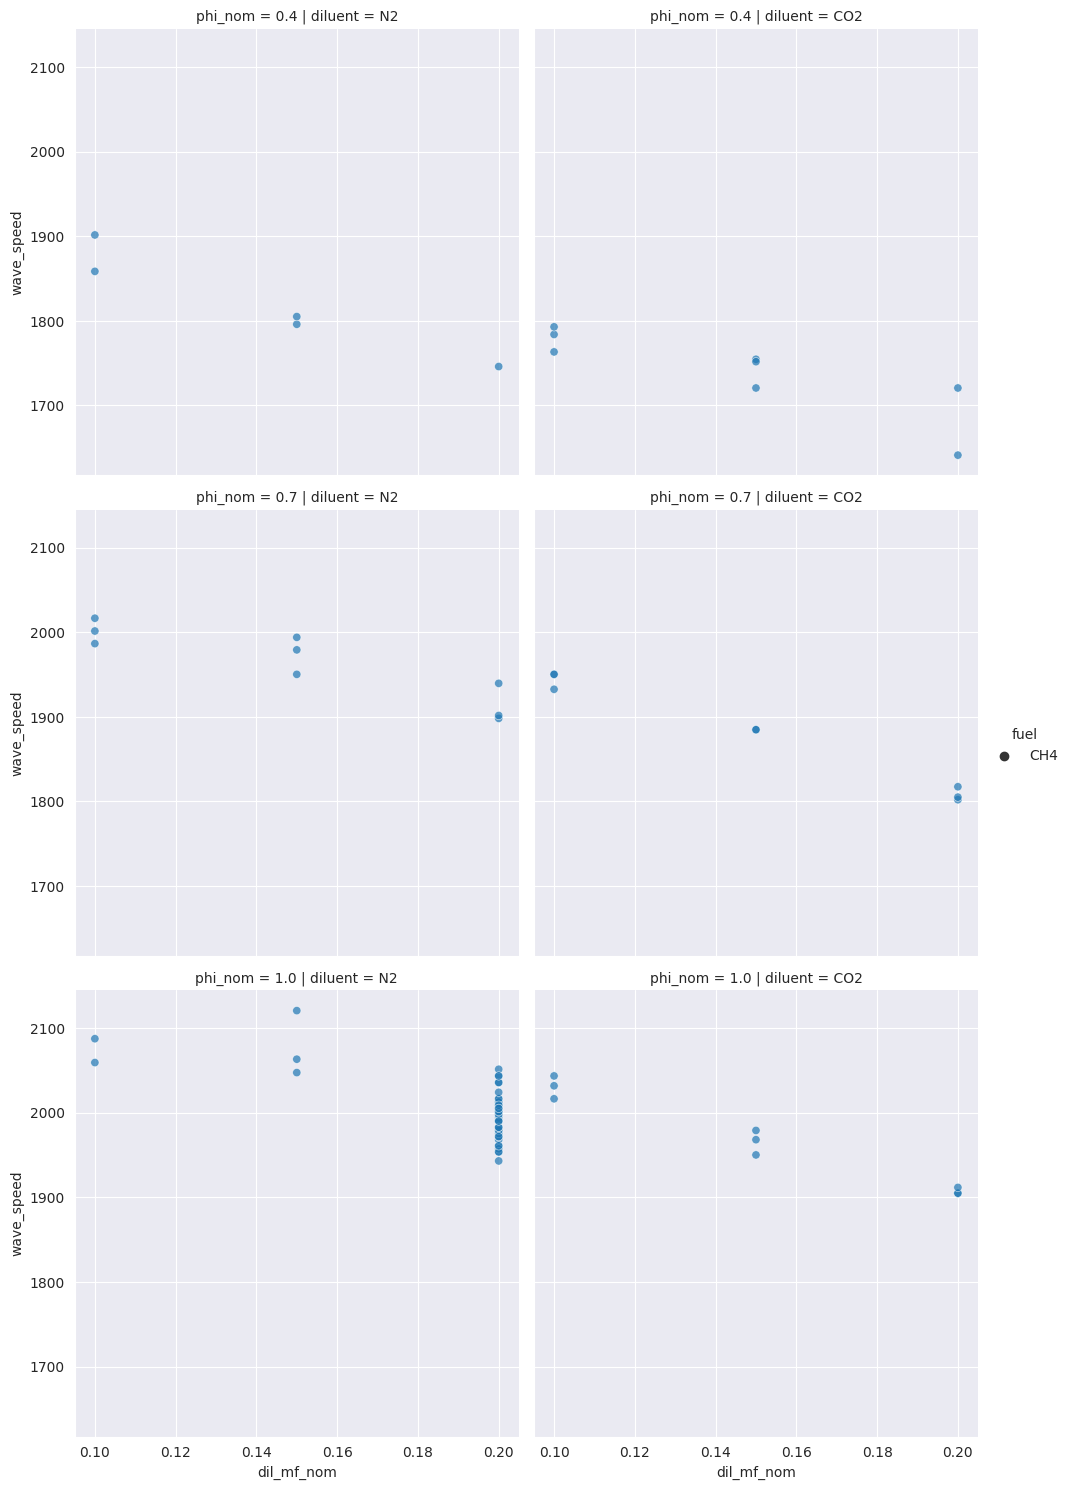

In [18]:
sns.relplot(
    x="dil_mf_nom",
    y="wave_speed",
    row="phi_nom",
    style="fuel",
    col="diluent",
    data=plot_data,
    alpha=0.7,
)

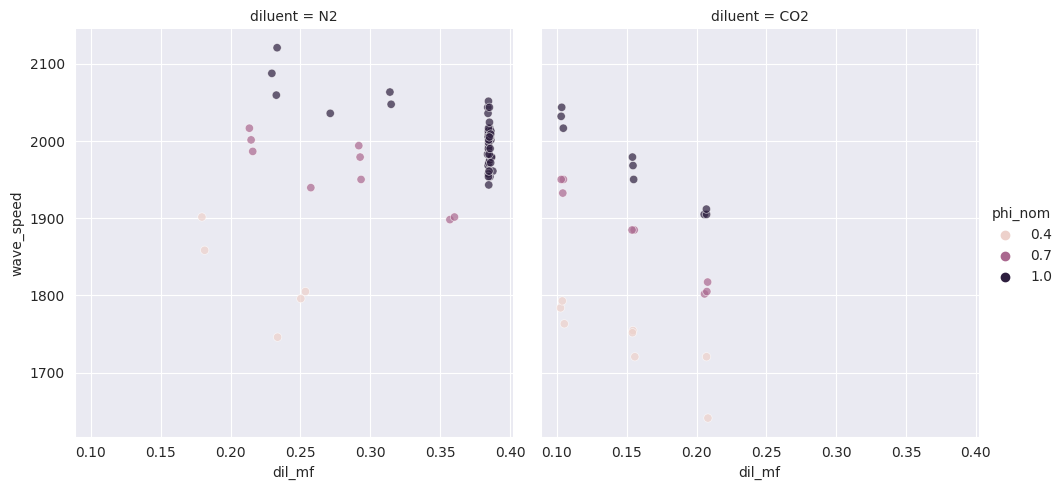

In [30]:
sns.relplot(
    x="dil_mf",
    y="wave_speed",
    hue="phi_nom",
    # style="fuel",
    col="diluent",
    data=plot_data,
    alpha=0.7,
)

1. compare n2 vs co2 diluted (curve fit the lines (???)) -> how does co2 suppress vs. n2
2. why is there a difference? lol who knows. (chemistry, sound speed, AFT, combination of all?)

LinregressResult(slope=0.05546939791318708, intercept=1.7807199304343628, rvalue=0.16996777917710862, pvalue=0.12448996601374988, stderr=0.035733764346677015, intercept_stderr=0.010861202208574158)

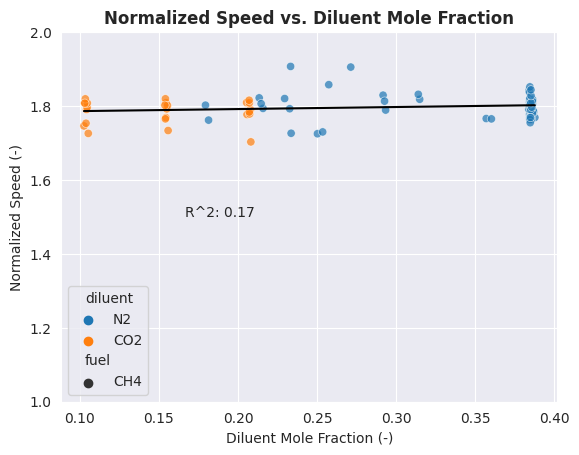

In [46]:
thing = plot_data.copy()
mol_frac = "dil_mf"
thing["normalized"] = plot_data["wave_speed"] / plot_data["sound_speed"]
sns.scatterplot(
    x=mol_frac,
    y="normalized",
    hue ="diluent",
    style="fuel",
    data=thing,
    alpha=0.7,
)
lr_sound_speed = linregress(thing[mol_frac], thing["normalized"])
x = np.array([thing[mol_frac].min(), data[mol_frac].max()])
plt.plot(x, lr_sound_speed.slope * x + lr_sound_speed.intercept, "k")
plt.ylim(1, 2)
plt.text(0.25, 0.5, f"R^2: {lr_sound_speed.rvalue:.2f}", transform=plt.gca().transAxes)
plt.title("Normalized Speed vs. Diluent Mole Fraction", weight="bold")
plt.xlabel("Diluent Mole Fraction (-)")
plt.ylabel("Normalized Speed (-)");

lr_sound_speed

separate CO2 and N2 lines -> show that C

LinregressResult(slope=0.05077001070640377, intercept=0.9640198368990661, rvalue=0.2905845350484658, pvalue=0.007699515328521933, stderr=0.018575298537970065, intercept_stderr=0.005645922762242823)

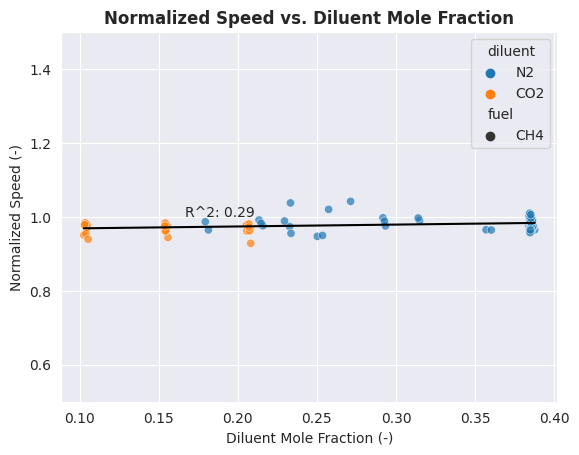

In [44]:
thing = plot_data.copy()
mol_frac = "dil_mf"
thing["normalized"] = plot_data["wave_speed"] / plot_data["cj_speed"]
sns.scatterplot(
    x=mol_frac,
    y="normalized",
    hue ="diluent",
    style="fuel",
    data=thing,
    alpha=0.7,
)
lr_sound_speed = linregress(thing[mol_frac], thing["normalized"])
x = np.array([thing[mol_frac].min(), data[mol_frac].max()])
plt.plot(x, lr_sound_speed.slope * x + lr_sound_speed.intercept, "k")
plt.ylim(0.5, 1.5)
plt.text(0.25, 0.5, f"R^2: {lr_sound_speed.rvalue:.2f}", transform=plt.gca().transAxes)
plt.title("Normalized Speed vs. Diluent Mole Fraction", weight="bold")
plt.xlabel("Diluent Mole Fraction (-)")
plt.ylabel("Normalized Speed (-)");

lr_sound_speed

todo in the future: Why would we have a chemical effect from CO2 sometimes but not others?

# Dissertation

1. Overview will still need a small lit review -- can modify prelims a bit
2. Introduction to tie together the manuscripts
3. Pypbomb paper
4. Soot foil paper
5. this stuff

---

# Chapter notes (this manuscript)

## Outline

1. Intro - probably write this last, and copy/paste as much as possible
2. Lit Review - how much of this can I copy/paste? anything from unpublished material!
3. Approach - write this first
4. Results and Discussion - what the heck did we learn anyway?

## Results

1. Look at measured cell sizes -> we can't say anything based on this
2. Wave speeds (non-normalized) vs. dil mf
3. Wave speeds (normalized) vs. dil mf (and curve fits)

# TODO THIS WEEK

* finalize these plots (and the ones with cell size) -- new notebook for this manuscript
* send plots to DB
* Start writing approach -- keep open dialog with DB as needed (when frustrated etc.)
* DB will dig into chemistry thread